In this example, we improve the convergence rate of the trapezium rule by adding a **residue correction**. As we have shown in the notes, the error can be represented as a residue plus a contour integral. The residue is the largest component, but fortunately, we can evaluate this component of the error exactly, so we can effectively subtract it from the error!

In [252]:
using Plots, Polynomials, LaTeXStrings

Now define the a function which returns the nodes of the truncated trapezium rule $I_h^{(N)}$:

In [254]:
trap_rule_trunc(N, h) = [j*h for j in -N:N]#, repeat([h],2N+1)

trap_rule_trunc (generic function with 1 method)

The integral for this experiment is
$$
\int_{-\infty}^{\infty} f(z) dz = \int_{-\infty}^{\infty} \frac{e^{-z^2}\sqrt{z-2i}}{z-i} dz,
$$
where the branch cut of the square root function is chosen not to cross the real axis, thus the integrand $f$ is analytic. Note that there is a pole at $z=i$, and a branch point at $z=2i$. The convergence of the standard trapezium rule will be limited by the pole at $z=i$.

In [256]:
f(z) = exp(-z^2) * sqrt(z-2im) / (z-im)

f (generic function with 1 method)

**Convergence of standard trapezium rule**

In the notes, we have derived the optimal meshwidth as:
$$h=\left(\frac{2\pi}{N^2}\right)^{1/3}$$
We now test the standard trapezium rule, and observe exponential convergence.

In [258]:
N_max = 40
approx_val = zeros(ComplexF64, N_max)
for N=1:N_max
    h = (2*pi/N^2)^(1/3) # optimal h
    x = trap_rule_trunc(N, h)
    approx_val[N] = h*sum(f.(x)) # apply trap rule
end

# Need a high order reference solution, as we don't have an exact value for this integral
N_ref = 100
h_ref = (2*pi/N_ref^2)^(1/3)
x = trap_rule_trunc(N_ref, h_ref)
I_ref = h_ref*sum(f.(x))

# compute absolute errors
errs = abs.(approx_val .- I_ref);


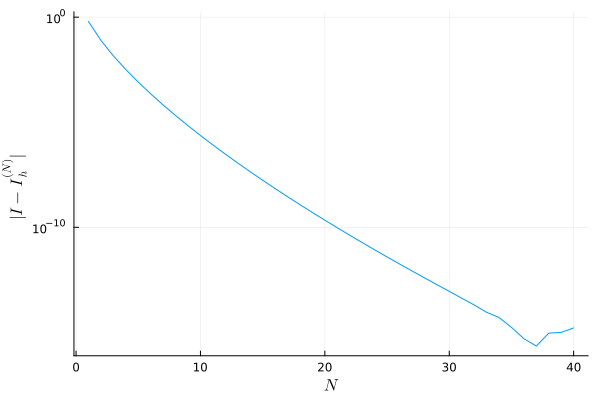

In [259]:
plot(1:N_max, errs, yscale=:log10, xlabel=L"$N$", ylabel=L"$|I-I_h^{(N)}|$", labels=false)

In [260]:
function get_exp_conv_rate(errs)
    p =  fit(1:length(errs),log.(errs),1) # fits a line of best fit through log of data
    return p[1] # returns gradient of line
end

get_exp_conv_rate (generic function with 1 method)

In [261]:
get_exp_conv_rate(errs[err_range])

-0.7674950404716745

**Convergence of the trapezium rule with a residue correction**

We have an exponentially convergent method... but can we converge at a *faster* exponential rate? Using the formula in the nodes, we subtract the residue:
$$
2\pi i\mathrm{Res}\left(\frac{-f(z)}{1-e^{-2\pi i z/h}},i\right) = \frac{-2\pi if(z_0)}{1-e^{\mp 2\pi i z_0 /h}} = \frac{-2\pi i e\sqrt{-i} }{ 1-e^{2\pi/h}}
$$
This allows us to take $a=2$, and thus gives us a new meshwidth parameter $h$. We now observe a faster convergence rate!

In [263]:
N_max = 40
approx_val_corrected = zeros(ComplexF64, N_max)
for N=1:N_max
    h = (4*pi/N^2)^(1/3) # optimal meshwidth
    x = trap_rule_trunc(N, h)
    res = -2π*im*exp(1)sqrt(-im) / (1-exp(2π/h)) # residue
    approx_val_corrected[N] = h*sum(f.(x)) - res # trapezium rule + residue
end

# compute absolute errors
errs_after_correction = abs.(approx_val_corrected .- I_ref);

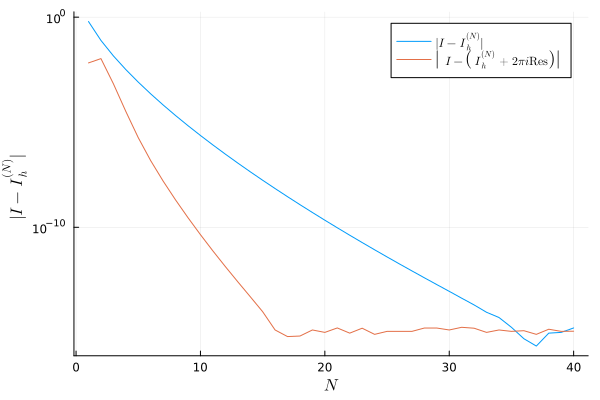

In [275]:
plot(1:N_max, [errs, errs_after_correction], yscale=:log10, xlabel=L"$N$", ylabel=L"$|I-I_h^{(N)}|$",
    label=[L"$|I-I_h^{(N)}|$" L"$\left|I-\left(I_h^{(N)}+2\pi i\mathrm{Res}\right)\right|$"])